In [64]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import seaborn as sn


In [2]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

# Normalizing our x data

In [11]:
x_train = x_train/255.0
x_test = x_test/255.0

#ANN Modeling

In [41]:
ann = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2981 - accuracy: 0.9156
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1432 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1046 - accuracy: 0.9692
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0831 - accuracy: 0.9752
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0677 - accuracy: 0.9794


In [43]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9737


[0.08596274256706238, 0.9736999869346619]

In [44]:
y_ann_predict = ann.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [45]:
y_ann_predict.shape

(10000, 10)

In [46]:
y_ann_predict_classes = [np.argmax(element) for element in y_ann_predict]

In [47]:
y_ann_predict_classes[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [48]:
print('classification Reports: \n', classification_report(y_test,y_ann_predict_classes))

classification Reports: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [49]:
x_train.shape

(60000, 28, 28)

#For CNN we need 4 dimensions

In [50]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

#CNN Modeling

In [51]:
cnn = models.Sequential([
    layers.Conv2D(filters=24,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1669 - accuracy: 0.9511
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0604 - accuracy: 0.9817
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0408 - accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0289 - accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0210 - accuracy: 0.9930


In [53]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0456 - accuracy: 0.9850


[0.04563562199473381, 0.9850000143051147]

In [54]:
y_cnn_predict = cnn.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [55]:
y_cnn_predict[0]

array([1.41983367e-08, 2.96666975e-08, 2.63698951e-07, 6.63586525e-06,
       1.02209306e-07, 9.62783048e-11, 4.97186439e-13, 9.99988377e-01,
       6.85812296e-08, 4.48397441e-06], dtype=float32)

In [56]:
y_cnn_predict_classes = [np.argmax(element) for element in y_cnn_predict]

In [57]:
y_cnn_predict_classes[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [58]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [59]:
print('classification Reports: \n', classification_report(y_test,y_cnn_predict_classes))

classification Reports: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



In [60]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
plt.imshow(([0]))

In [67]:
cm = confusion_matrix(y_test,y_cnn_predict_classes)

Text(50.722222222222214, 0.5, 'Truth')

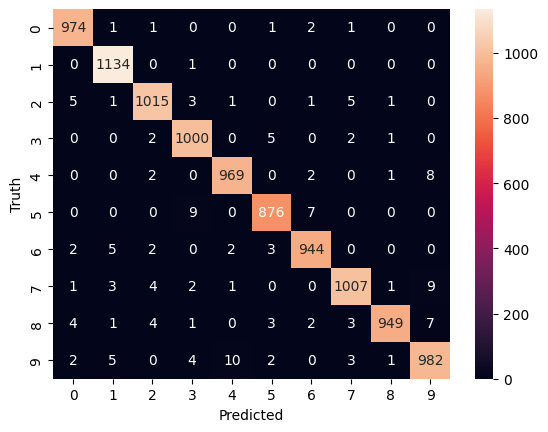

In [72]:
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted') # By convention X is prediction
plt.ylabel('Truth')